In [1]:
import os
from glob import glob
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr



In [2]:
data_path_to = 'G:/.shortcut-targets-by-id/10wVB-YsfTmmpZyUo8jBH1cDOkVWVx5N1/T1 Project/Data/Training-Splitted/'
os.path.exists(data_path_to)

True

In [3]:
local_data_path_to="Data/Training-Splitted/"
os.path.exists(local_data_path_to)

True

In [4]:
img_data_path = 'G:/.shortcut-targets-by-id/10wVB-YsfTmmpZyUo8jBH1cDOkVWVx5N1/T1 Project/Data/Training-Splitted/train/Annotation/'
files = sorted(os.listdir(img_data_path))
#print(files)


    

In [5]:
pixel_count=[]
for f in files:
    label = Image.open(img_data_path+f)
    label = np.array(label)
    label = tf.convert_to_tensor(label)
    label = tf.cast(label, tf.float32) / 255.0
    label = tf.cast(label, tf.int32)
    pixel_count.append(np.sum(label))


In [6]:
print(pixel_count)

[1632, 1608, 1924, 2496, 1536, 2628, 2628, 1464, 2032, 1308, 2320, 2288, 1812, 2712, 2032, 2748, 2224, 2744, 1644, 1624, 2884, 1736, 3376, 1452, 1768, 2412, 1516, 1688, 1876, 1888, 2732, 2344, 1696, 2076, 2092, 2172, 3016, 2836, 2208, 3292, 2388, 2576, 2576, 1612, 2912, 2960, 2080, 1800, 3300, 2760, 2300, 2088, 3044, 2564, 1624, 2316, 1552, 2956, 2832, 3024, 1860, 3576, 3508, 2860, 1452, 2840, 3108, 2832, 2288, 2212, 2092, 3172, 2180, 3524, 2200, 1424, 1604, 3680, 3452, 2664, 1856, 3084, 2644, 2420, 2976, 2608, 3112, 2992, 1508, 1500, 2696, 2536, 2536, 2140, 2920, 3308, 3100, 2900, 2080, 3404, 2756, 2628, 3168, 3000, 2100, 2116, 3628, 1432, 3468, 2080, 1592, 1836, 1880, 1924, 1788, 3016, 3336, 2036, 2320, 3264, 3472, 3560, 3400, 2340, 1936, 1732, 2600, 2672, 2772, 2468, 2920, 3536, 2168, 3324, 1468, 2912, 2476, 2388, 2364, 2648, 2736, 3084, 2660, 3136, 3384, 1704, 2032, 2628, 2992, 2968, 3188, 2256, 2964, 3076, 3232, 3192, 3080, 3076, 3060, 3148, 3016, 2544, 1508, 3420, 2784, 3336, 235

In [7]:
#train_pixel_sz_HC_file = local_data_path_to + 'training_set_pixel_size_and_HC.csv'
#os.path.exists(train_pixel_sz_HC_file)

True

In [58]:
train_pixel_sz_HC_file = local_data_path_to + 'train_split_pixel_size_and_HC.csv'
os.path.exists(train_pixel_sz_HC_file)

True

In [61]:
train_pixel_sz_HC_df = pd.read_csv(train_pixel_sz_HC_file)
train_pixel_sz_HC_df.head()

,Unnamed: 0,filename,pixel size(mm),head circumference (mm)
0,0,000_HC.png,0.069136,44.30
1,1,001_HC.png,0.089659,56.81
2,2,003_HC.png,0.091291,69.00
3,3,004_HC.png,0.061240,59.81
4,4,005_HC.png,0.115814,69.80


In [60]:
#train_pixel_sz_HC_df = train_pixel_sz_HC_df.iloc[:, -3:]
#train_pixel_sz_HC_df.head()

,pixel size(mm),head circumference (mm),anno_filename
0,0.069136,44.30,000_HC_Annotation.png
1,0.089659,56.81,001_HC_Annotation.png
2,0.091291,69.00,003_HC_Annotation.png
3,0.061240,59.81,004_HC_Annotation.png
4,0.115814,69.80,005_HC_Annotation.png


In [62]:
# Define a function to update the filename
def update_filename(filename):
    return filename.replace(".png", "_Annotation.png")

# Apply the function to create a new column with updat filenames
train_pixel_sz_HC_df['anno_filename'] = train_pixel_sz_HC_df['filename'].apply(lambda x: update_filename(x))


In [63]:
train_pixel_sz_HC_df.head()

,Unnamed: 0,filename,pixel size(mm),head circumference (mm),anno_filename
0,0,000_HC.png,0.069136,44.30,000_HC_Annotation.png
1,1,001_HC.png,0.089659,56.81,001_HC_Annotation.png
2,2,003_HC.png,0.091291,69.00,003_HC_Annotation.png
3,3,004_HC.png,0.061240,59.81,004_HC_Annotation.png
4,4,005_HC.png,0.115814,69.80,005_HC_Annotation.png


In [64]:
def get_pixel_count(img_data_path, filename):
    file_path = os.path.join(img_data_path, filename)
    if os.path.exists(file_path):
        label = Image.open(file_path)
        label = np.array(label)
        label = tf.convert_to_tensor(label)
        label = tf.cast(label, tf.float32) / 255.0
        label = tf.cast(label, tf.int32)
        pixel_count = np.sum(label)
    else:
        print("No such file: " + filename)
        pixel_count = np.nan

    return pixel_count

train_pixel_sz_HC_df['pixel_count'] = train_pixel_sz_HC_df['anno_filename'].apply(lambda x: get_pixel_count(img_data_path, x))


In [65]:
train_pixel_sz_HC_df.head()

,Unnamed: 0,filename,pixel size(mm),head circumference (mm),anno_filename,pixel_count
0,0,000_HC.png,0.069136,44.30,000_HC_Annotation.png,1632
1,1,001_HC.png,0.089659,56.81,001_HC_Annotation.png,1608
2,2,003_HC.png,0.091291,69.00,003_HC_Annotation.png,1924
3,3,004_HC.png,0.061240,59.81,004_HC_Annotation.png,2496
4,4,005_HC.png,0.115814,69.80,005_HC_Annotation.png,1536


In [69]:
# Remove rows with missing values
# cleaned_df = train_pixel_sz_HC_df.dropna()  # no need to do it anymore
train_pixel_sz_HC_df = train_pixel_sz_HC_df.dropna()  # just in case

In [67]:
#Set target
target_name ='head circumference (mm)'

#y = cleaned_df[target_name]
y = train_pixel_sz_HC_df[target_name]

In [68]:
#Set Input Feature X = [x1,, x2]
feature_names = ['pixel_count','pixel size(mm)']
#X = cleaned_df[feature_names]
X = train_pixel_sz_HC_df[feature_names]

In [70]:
# do linear regression mmodel first
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)


In [71]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_train1, y_train1)


LinearRegression()

In [72]:
# evul linear reg model
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test data
y_pred1 = model1.predict(X_test1)

# Calculate evaluation metrics
mse1 = mean_squared_error(y_test1, y_pred1)
r2_1 = r2_score(y_test1, y_pred1)

print("Mean Squared Error of linear regression : ", mse1, ("(mm)"))
print("R-squared Score:", r2_1)


Mean Squared Error of linear regression :  153.5295696326789 (mm)
R-squared Score: 0.968348907819744


In [73]:
np.average(y_pred1)

166.2136794702675

In [74]:
train_pixel_sz_HC_df[target_name].mean()

172.83649499284695

In [75]:
## this is train model linear regression using train set
print("Intercept:", model1.intercept_)
print("Coefficients:", model1.coef_)

print("Coefficients:", model1.coef_[0])
print("Coefficients:", model1.coef_[1])

formula = "y = " + str(model1.coef_[0]) + " *  " + feature_names[0] + " + " + str(model1.coef_[1]) + " * " + feature_names[1]
print(formula)


Intercept: -155.7179204698763
Coefficients: [5.53566495e-02 1.08578421e+03]
Coefficients: 0.05535664951972703
Coefficients: 1085.7842110830757
y = 0.05535664951972703 *  pixel_count + 1085.7842110830757 * pixel size(mm)


In [23]:
### what do yu think ?

In [76]:
print(feature_names)

['pixel_count', 'pixel size(mm)']


In [25]:
# Train regress model 2: random forest regressor #####

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [152]:
# Split into validation and training data
#Train Random forest model on train_x train_y
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Define a random forest model
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
rf_val_predictions_0 = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

rf_val_mae

ValueError: Found input variables with inconsistent numbers of samples: [699, 300]

In [80]:
# To improve accuracy, create a new Random Forest model which I will train on all training data
rf_model_on_full_train_data = RandomForestRegressor(random_state=1)

# fit rf_model_on_full_data on all data from the training data
rf_model_on_full_train_data.fit(X, y)


RandomForestRegressor(random_state=1)

In [83]:
rf_val_predictions = rf_model_on_full_train_data.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

rf_val_mae

1.430364571428559

In [85]:
rf_model_on_full_train_data.feature_importances_
feature_importance = rf_model_on_full_train_data.feature_importances_

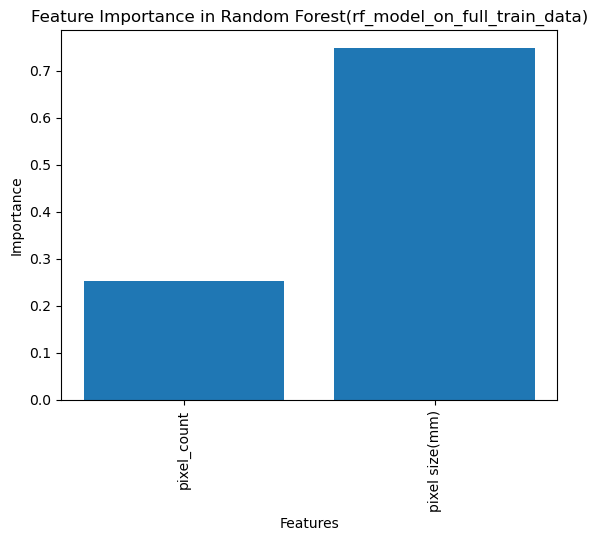

In [86]:
plt.bar(feature_names, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest(rf_model_on_full_train_data)')
plt.xticks(rotation='vertical')
plt.show()

In [31]:
#----prediction with ----

In [88]:
# prediction on made-up data
#new_data = pd.DataFrame({'pixel_count': [2000, 3000], 'pixel size(mm)': [30, 35]})
#prediction1 = model1.predict(new_data)
#prediction2 = rf_model_on_full_train_data.predict(new_data)

#print("Predicted Head Circum with linear regression", prediction1)
#print("Predicted Head Circum with random tree regression", prediction2)

Predicted Head Circum with linear regression [32528.52171106 38012.799416  ]
Predicted Head Circum with random tree regression [223.2374 323.1298]


In [33]:
# continue to "validate"
val_img_data_path = 'G:/.shortcut-targets-by-id/10wVB-YsfTmmpZyUo8jBH1cDOkVWVx5N1/T1 Project/Data/Training-Splitted/val/Annotation/'

In [89]:
# note to self - val + test are together.
#test_pixel_sz_HC_file = local_data_path_to + 'test_set_pixel_size.csv'
#os.path.exists(test_pixel_sz_HC_file )

In [90]:
val_pixel_sz_HC_file = local_data_path_to + 'val_split_pixel_size_and_HC.csv'
os.path.exists(test_pixel_sz_HC_file )

True

In [91]:
# continue to "validate"
val_pixel_sz_HC_df = pd.read_csv(test_pixel_sz_HC_file)
val_pixel_sz_HC_df.head()

,Unnamed: 0,filename,pixel size(mm),head circumference (mm)
0,2,002_HC.png,0.062033,68.75
1,12,011_HC.png,0.055484,69.90
2,16,014_3HC.png,0.077308,60.26
3,17,014_HC.png,0.078906,63.34
4,18,015_HC.png,0.060416,69.30


In [36]:
def get_pixel_count2(img_data_path, filename):
    file_path = os.path.join(img_data_path, filename)
    if os.path.exists(file_path):
        label = Image.open(file_path)
        label = np.array(label)
        label = tf.convert_to_tensor(label)
        label = tf.cast(label, tf.float32) / 255.0
        label = tf.cast(label, tf.int32)
        pixel_count = np.sum(label)
    else:
        print("No such file: " + filename)
        pixel_count = np.nan

    return pixel_count


In [92]:
# continue to "validate"
val_pixel_sz_HC_df['anno_filename'] = val_pixel_sz_HC_df['filename'].apply(lambda x: update_filename(x))

In [93]:
# continue to "validate"  apply pixel count on "val img data"
val_pixel_sz_HC_df['pixel_count'] = val_pixel_sz_HC_df['anno_filename'].apply(lambda x: get_pixel_count(val_img_data_path, x))


In [100]:
# continue to "validate"
val_pixel_sz_HC_df=val_pixel_sz_HC_df.dropna()  #just in case

In [95]:
# continue to "validate"
val_pixel_sz_HC_df[feature_names].head()

,pixel_count,pixel size(mm)
0,2820,0.062033
1,3208,0.055484
2,1980,0.077308
3,2044,0.078906
4,2928,0.060416


In [101]:
print(feature_names)

['pixel_count', 'pixel size(mm)']


In [103]:
X_val = val_pixel_sz_HC_df[feature_names]
X_val

,pixel_count,pixel size(mm)
0,2820,0.062033
1,3208,0.055484
2,1980,0.077308
3,2044,0.078906
4,2928,0.060416
...,...,...
295,3296,0.246141
296,3932,0.202475
297,3616,0.210600
298,4328,0.181221


In [107]:
# linear regression model prediction
y_pred_w_LR = model1.predict(X_val)
y_pred_w_LR

array([ 67.74180865,  82.10999917,  37.82771695,  43.10623047,
        71.96462893,  66.49927666,  79.91661833,  51.96789659,
        70.340089  ,  40.30981604,  59.60994934,  56.26144693,
        59.04900009,  68.81715215,  71.20452335,  53.80159602,
        91.62609728,  59.87129569,  68.63401111,  75.46468321,
       101.16132799,  67.12033518,  53.34361992,  63.78076191,
        77.1447305 ,  54.99073077,  59.99803467,  86.36917586,
        93.74180217,  84.44994042,  74.72696171,  70.37882591,
        76.15101972,  68.44420293,  94.16820296, 109.39921768,
       104.13940644,  97.06511984, 110.7533769 ,  84.89045983,
        88.03224087, 104.36005001, 105.91819344,  89.33130784,
       138.02258659, 141.41607883, 101.78275244,  91.33007742,
        92.21984237, 112.38276106, 110.45013909, 101.60365968,
       109.31491578, 116.78803797, 108.63778375, 137.49662198,
       119.01229109, 114.03316528, 140.42383429, 156.88576154,
       139.74156661, 136.01149164, 156.83849207, 160.50

In [110]:
print(target_name)

head circumference (mm)


In [117]:
y_val = val_pixel_sz_HC_df[target_name]
y_val

0       68.75
1       69.90
2       60.26
3       63.34
4       69.30
        ...  
295    320.00
296    324.60
297    299.17
298    308.50
299    335.00
Name: head circumference (mm), Length: 300, dtype: float64

In [121]:
from scipy.stats import pearsonr

# Calculate the correlation coefficient and p-value
correlation, p_value = pearsonr(y_val, y_pred_w_LR)

print("Linear regression model: " + formula)
print("Correlation coefficient:", correlation)
print("p-value:", p_value)


Linear regression model: y = 0.05535664951972703 *  pixel_count + 1085.7842110830757 * pixel size(mm)
Correlation coefficient: 0.9805093083523606
p-value: 1.1939178069055383e-212


In [131]:
val_pixel_sz_HC_df["predicted HC from LM"] = y_pred_w_LR

In [132]:
# after lapply annotated filename and pixel count function
val_pixel_sz_HC_df.head()

,Unnamed: 0,filename,pixel size(mm),head circumference (mm),anno_filename,pixel_count,predicted HC from LM
0,2,002_HC.png,0.062033,68.75,002_HC_Annotation.png,2820,67.741809
1,12,011_HC.png,0.055484,69.90,011_HC_Annotation.png,3208,82.109999
2,16,014_3HC.png,0.077308,60.26,014_3HC_Annotation.png,1980,37.827717
3,17,014_HC.png,0.078906,63.34,014_HC_Annotation.png,2044,43.106230
4,18,015_HC.png,0.060416,69.30,015_HC_Annotation.png,2928,71.964629


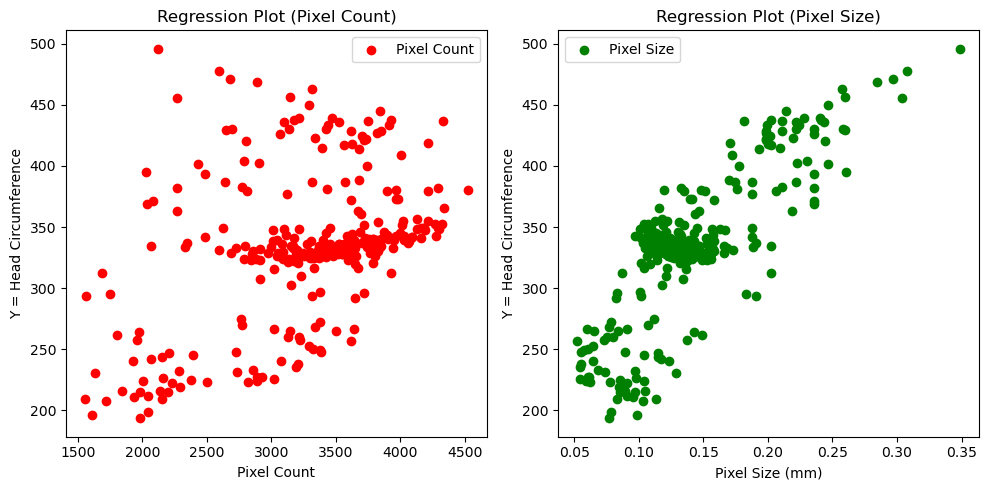

In [169]:
import numpy as np
import matplotlib.pyplot as plt

# Convert pixel_count and pixel_size to arrays
pixel_count = np.array(val_pixel_sz_HC_df["pixel_count"])
pixel_size = np.array(val_pixel_sz_HC_df["pixel size(mm)"])

# Compute the corresponding y values based on the equation
y = 0.05535664951972703 * pixel_count + 1085.7842110830757 * pixel_size

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the pixel count subplot
ax1.scatter(pixel_count, y, color='red', label='Pixel Count')
ax1.set_xlabel('Pixel Count')
ax1.set_ylabel('Y = Head Circumference')
ax1.set_title('Regression Plot (Pixel Count)')
# ax1.text(0.5, 0.9, 'y = 0.05535664954711476 * pixel_count + 1085.7842108179545 * pixel_size',
#         transform=ax1.transAxes, fontsize=10, verticalalignment='top')

# Plot the pixel size subplot
ax2.scatter(pixel_size, y, color='green', label='Pixel Size')
ax2.set_xlabel('Pixel Size (mm)')
ax2.set_ylabel('Y = Head Circumference')
ax2.set_title('Regression Plot (Pixel Size)')
# ax2.text(0.5, 0.9, 'y = 0.05535664954711476 * pixel_count + 1085.7842108179545 * pixel_size',
#        transform=ax2.transAxes, fontsize=10, verticalalignment='top')

# Add a legend to the subplots
ax1.legend()
ax2.legend()

# Adjust the spacing between subplots 
plt.tight_layout()

# Show the plots
plt.show()






In [137]:
X_val



,pixel_count,pixel size(mm)
0,2820,0.062033
1,3208,0.055484
2,1980,0.077308
3,2044,0.078906
4,2928,0.060416
...,...,...
295,3296,0.246141
296,3932,0.202475
297,3616,0.210600
298,4328,0.181221


In [139]:
y_pred2_w_RF = rf_model_on_full_train_data.predict(X_val)

val_pixel_sz_HC_df["predicted HC from RF"] = y_pred2_w_RF

In [140]:
val_pixel_sz_HC_df

,Unnamed: 0,filename,pixel size(mm),head circumference (mm),anno_filename,pixel_count,predicted HC from LM,predicted HC from RF
0,2,002_HC.png,0.062033,68.75,002_HC_Annotation.png,2820,67.741809,69.6586
1,12,011_HC.png,0.055484,69.90,011_HC_Annotation.png,3208,82.109999,73.4191
2,16,014_3HC.png,0.077308,60.26,014_3HC_Annotation.png,1980,37.827717,63.2613
3,17,014_HC.png,0.078906,63.34,014_HC_Annotation.png,2044,43.106230,64.0114
4,18,015_HC.png,0.060416,69.30,015_HC_Annotation.png,2928,71.964629,69.9327
...,...,...,...,...,...,...,...,...
295,970,783_4HC.png,0.246141,320.00,783_4HC_Annotation.png,3296,293.993371,320.2547
296,976,787_HC.png,0.202475,324.60,787_HC_Annotation.png,3932,281.789006,309.5710
297,982,792_HC.png,0.210600,299.17,792_HC_Annotation.png,3616,273.117960,287.8599
298,985,794_HC.png,0.181221,308.50,794_HC_Annotation.png,4328,280.632148,284.3334


In [143]:
y_val


0       68.75
1       69.90
2       60.26
3       63.34
4       69.30
        ...  
295    320.00
296    324.60
297    299.17
298    308.50
299    335.00
Name: head circumference (mm), Length: 300, dtype: float64

In [154]:
# Calculate the correlation coefficient and p-value  # linear regression
correlation_lr, p_value_lr = pearsonr(y_val, y_pred_w_LR)

print("Linear regression model: " + formula)
print("Correlation coefficient:", correlation_lr)
print("p-value:", p_value_lr)
print("MAE:", mse1)

print(" ")
correlation_rf, p_value_rf = pearsonr(y_val, y_pred2_w_RF)

print("random tree regression model: " )
print("Correlation coefficient:", correlation_rf)
np.set_printoptions(precision=8)
print("p-value:", p_value_rf)
print("MAE:", rf_val_mae)


# p-value = 0 that is reject null hypothesis-- the 
# Compare the models
if abs(correlation_lr) > abs(correlation_rf):
    best_model = "Linear Regression"
    best_correlation = correlation_lr
    best_p_value = p_value_lr
else:
    best_model = "Random Forest"
    best_correlation = correlation_rf
    best_p_value = p_value_rf

print("  ")
print("Best Model based on correlation:")
print("Model:", best_model)
print("Correlation Coefficient:", best_correlation)
print("p-value:", best_p_value)

Linear regression model: y = 0.05535664951972703 *  pixel_count + 1085.7842110830757 * pixel size(mm)
Correlation coefficient: 0.9805093083523606
p-value: 1.1939178069055383e-212
MAE: 153.5295696326789
 
random tree regression model: 
Correlation coefficient: 0.9968396344016947
p-value: 0.0
MAE: 1.430364571428559
  
Best Model based on correlation:
Model: Random Forest
Correlation Coefficient: 0.9968396344016947
p-value: 0.0


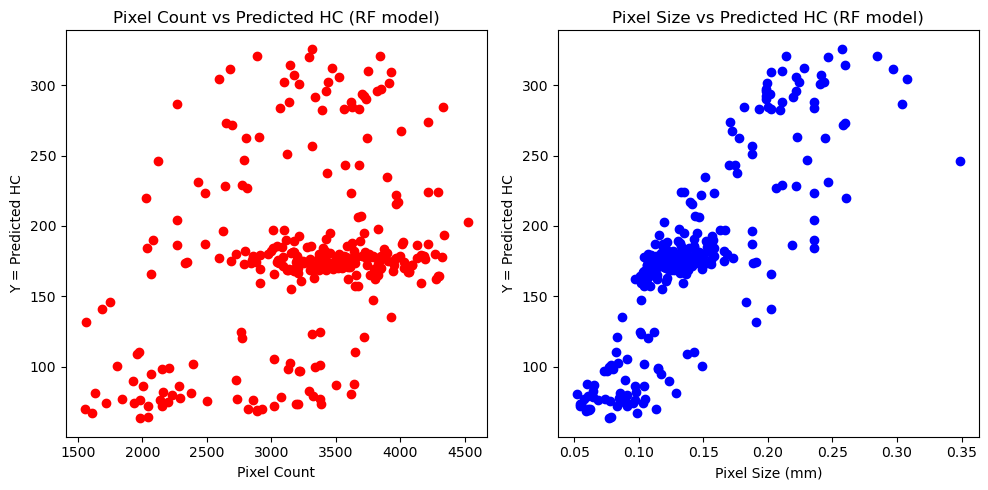

In [170]:
import matplotlib.pyplot as plt

# Get the feature values for plotting
pixel_count = val_pixel_sz_HC_df['pixel_count']
pixel_size = val_pixel_sz_HC_df['pixel size(mm)']


# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot pixel_count vs y_pred_rf
axs[0].scatter(pixel_count, y_pred2_w_RF, color='red', label='Predicted Values')
axs[0].set_xlabel('Pixel Count')
axs[0].set_ylabel('Y = Predicted HC')
axs[0].set_title('Pixel Count vs Predicted HC (RF model)')

# Plot pixel_size vs y_pred_rf
axs[1].scatter(pixel_size, y_pred2_w_RF, color='blue', label='Predicted Values')
axs[1].set_xlabel('Pixel Size (mm)')
axs[1].set_ylabel('Y = Predicted HC')
axs[1].set_title('Pixel Size vs Predicted HC (RF model)')


# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



In [166]:
import joblib

# Assuming rf_model_on_full_data is your trained Random Forest model
# ...

# Specify the filename and path for saving the model
model_filename = 'Output\pixelCt_pixelSz_toHeadCir_rfReg.joblib'



In [172]:
# Save the model to a file
joblib.dump(rf_model_on_full_train_data, model_filename)

['Output\\pixelCt_pixelSz_toHeadCir_rfReg.joblib']

In [174]:
#import joblib

# Load the trained Random Forest model
#loaded_model = joblib.load('rf_model_on_full_data.joblib')

# Define a mapping function that uses the loaded model for predictions
def mapping_function(input_data):
    # Perform any necessary data preprocessing on input_data
    # ...

    # Make predictions using the loaded model
    predictions = loaded_model.predict(input_data)

    # Return the predictions
    return predictions